<a href="https://colab.research.google.com/github/yunhyeongil/pandas_base/blob/main/3%EC%9D%BC%EC%B0%A8_%EC%8B%A4%EC%8A%B5%ED%95%98%EA%B8%B0.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Bag of words (BOW)

1. 통계와 머신러닝을 활용한 방법
2. 인공 신경망을 활용한 방법

doc1 = 'John likes to watch movies. Mary likes movies too.'

BoW1 = {"John":1, "likes":2, "to":1, "watch":1, "movies":2, "Mary":1, "too":1}


doc2 = 'Mary also likes to watch football games.'  
BoW2 = {"Mary":1, "also":1, "likes":1, "to":1, "watch":1, "football":1, "games":1}


doc3 = 'John likes to watch movies. Mary likes movies too. Mary also likes to watch football games.'  
BoW3 = {"John":1, "likes":3, "to":2, "watch":2, "movies":2, "Mary":2, "too":1, "also":1, "football":1, "games":1};



## keras Tokenizer를 활용한 BOW

In [ ]:
from tensorflow.keras.preprocessing.text import Tokenizer

sentence = ["John likes to watch movies. Mary likes movies too! Mary also likes to watch football games."]

In [ ]:
def print_bow(sentence):
  tokenizer = Tokenizer()
  tokenizer.fit_on_texts(sentence) # 단어장 생성
  bow = dict(tokenizer.word_counts) # 각 단어와 각 단어의 빈도를 bow에 저장
  print("Bag of words :", bow) #bow출력
  print('단어장(vocabulary)의 크기 :', len(tokenizer.word_counts)) # 중복을 제거한 단어들의 갯수

print_bow(sentence)

Bag of words : {'john': 1, 'likes': 3, 'to': 2, 'watch': 2, 'movies': 2, 'mary': 2, 'too': 1, 'also': 1, 'football': 1, 'games': 1}
단어장(vocabulary)의 크기 : 10


## scikit-learn CountVectorizer활용한 BOW

In [ ]:
from sklearn.feature_extraction.text import CountVectorizer
sentence = ["John likes to watch movies. Mary likes movies too! Mary also likes to watch football games."]

vector = CountVectorizer()
print('Bag of Words : ', vector.fit_transform(sentence).toarray()) # 코퍼스로부터 각 단어의 빈도수를 기록
print('각 단어의 인덱스: ', vector.vocabulary_) # 각 단어의 인덱스가 어떻게 부여되는지를 보여줌.


Bag of Words :  [[1 1 1 1 3 2 2 2 1 2]]
각 단어의 인덱스:  {'john': 3, 'likes': 4, 'to': 7, 'watch': 9, 'movies': 6, 'mary': 5, 'too': 8, 'also': 0, 'football': 1, 'games': 2}


In [ ]:
print('단어장(vocabulary)의 크기 :', len(vector.vocabulary_))

단어장(vocabulary)의 크기 : 10


## DTM (Document-Term Matrix)

문서 1 : I like dog  
문서 2 : I like cat  
문서 3 : I like cat I like cat

In [ ]:
import pandas as pd
content = [[0,1,1,1],[1,0,1,1],[2,0,2,2,]]
df = pd.DataFrame(content)
df.index = ['문서1', '문서2', '문서3']
df.columns = ['cat', 'dog', 'I', 'like']
df

,cat,dog,I,like
문서1,0,1,1,1
문서2,1,0,1,1
문서3,2,0,2,2


In [ ]:
import numpy as np
from numpy import dot 
from numpy.linalg import norm

doc1 = np.array([0, 1, 1, 1])
doc2 = np.array([1, 0, 1, 1])
doc3 = np.array([2, 0, 2, 2])

def cos_sim(A, B):
  return dot(A, B)/(norm(A)*norm(B))

In [ ]:
print(cos_sim(doc1, doc2)) 
print(cos_sim(doc1, doc3))
print(cos_sim(doc2, doc3))

0.6666666666666667
0.6666666666666667
1.0000000000000002


DTM에서는 코사인 유사도는 0이상 1이하의 값을 가지고, 값이 1에 가까울수록 유사도 높다 판단

## scikit-learn CountVectorizer활용한 DTM구현

In [ ]:
from sklearn.feature_extraction.text import CountVectorizer

corpus = [
          'John likes to watch movies',
          'Mary likes movies too',
          'Mary also likes to watch football games',
]

vector = CountVectorizer()
print(vector.fit_transform(corpus).toarray()) # 코퍼스로부터 각 단어의 빈도수를 기록
print(vector.vocabulary_) # 각 단어의 인덱스가 어떻게 부여되었는지 보여준다.

[[0 0 0 1 1 0 1 1 0 1]
 [0 0 0 0 1 1 1 0 1 0]
 [1 1 1 0 1 1 0 1 0 1]]
{'john': 3, 'likes': 4, 'to': 7, 'watch': 9, 'movies': 6, 'mary': 5, 'too': 8, 'also': 0, 'football': 1, 'games': 2}


## TF-IDF

모든 문서에서 자주 등장하는 단어는 중요도가 낮다고 판단하며, 특정 문서에서만 자주 등장하는 단어는 중요도가 높다고 판단하는 것

단어의 빈도  
문서의 빈도의 역수

In [ ]:
from math import log
import pandas as pd

docs = [
        'John likes to watch movies and Mary likes movies too',
        'James likes to watch TV',
        'Mary also likes to watch football games',
]

In [ ]:
vocab = list(set(w for doc in docs for w in doc.split()))
vocab.sort()
print('단어장의 크기 :', len(vocab))
print(vocab)

단어장의 크기 : 13
['James', 'John', 'Mary', 'TV', 'also', 'and', 'football', 'games', 'likes', 'movies', 'to', 'too', 'watch']


In [ ]:
N = len(docs)
N

3

In [ ]:
def tf(t,d):
  return d.count(t)

def idf(t):
  df = 0
  for doc in docs:
    df += t in doc
  return log(N/(df + 1))+1

def tfidf(t, d):
  return tf(t,d)* idf(t)

TF함수를 사용하여 DTM을 만들어보자

In [ ]:
result = []
for i in range(N): # 각 문서에 대해서 아래 명령을 수행
  result.append([])
  d = docs[i]
  for j in range(len(vocab)):
    t = vocab[j]

    result[-1].append(tf(t,d))

tf_ = pd.DataFrame(result, columns=vocab)
tf_

,James,John,Mary,TV,also,and,football,games,likes,movies,to,too,watch
0,0,1,1,0,0,1,0,0,2,2,2,1,1
1,1,0,0,1,0,0,0,0,1,0,1,0,1
2,0,0,1,0,1,0,1,1,1,0,1,0,1


In [ ]:
result = []
for j in range(len(vocab)):
  t = vocab[j]
  result.append(idf(t))

idf_ = pd.DataFrame(result, index = vocab, columns = ["IDF"])
idf_

,IDF
James,1.405465
John,1.405465
Mary,1.000000
TV,1.405465
also,1.405465
and,1.405465
football,1.405465
games,1.405465
likes,0.712318
movies,1.405465


TF-IDF행렬을 출력 DTM에 있는 각 단어의 TF에 각 단어의 iDF를 곱해준 값

In [ ]:
result = []
for i in range(N):
  result.append([])
  d = docs[i]
  for j in range(len(vocab)):
    t = vocab[j]

    result[-1].append(tfidf(t,d))

tfidf_ = pd.DataFrame(result, columns= vocab)
tfidf_

,James,John,Mary,TV,also,and,football,games,likes,movies,to,too,watch
0,0.000000,1.405465,1.0,0.000000,0.000000,1.405465,0.000000,0.000000,1.424636,2.81093,1.424636,1.405465,0.712318
1,1.405465,0.000000,0.0,1.405465,0.000000,0.000000,0.000000,0.000000,0.712318,0.00000,0.712318,0.000000,0.712318
2,0.000000,0.000000,1.0,0.000000,1.405465,0.000000,1.405465,1.405465,0.712318,0.00000,0.712318,0.000000,0.712318


In [ ]:
'John likes to watch movies and Mary likes movies too',
'James likes to watch TV',
'Mary also likes to watch football games',
]

## scikit-learn TFidVectorizer활용

In [ ]:
from sklearn.feature_extraction.text import TfidfVectorizer
corpus = [
          'John likes to watch movies and Mary likes movies too',
          'James likes to watch TV',
          'Mary also likes to watch football games',
]

tfidfv = TfidfVectorizer().fit(corpus)
vocab = list(set(tfidfv.vocabulary_.keys()))
vocab.sort()

tfidf_ = pd.DataFrame(tfidfv.transform(corpus).toarray(), columns=vocab)
tfidf_

,also,and,football,games,james,john,likes,mary,movies,to,too,tv,watch
0,0.000000,0.321556,0.000000,0.000000,0.000000,0.321556,0.379832,0.244551,0.643111,0.189916,0.321556,0.000000,0.189916
1,0.000000,0.000000,0.000000,0.000000,0.572929,0.000000,0.338381,0.000000,0.000000,0.338381,0.000000,0.572929,0.338381
2,0.464997,0.000000,0.464997,0.464997,0.000000,0.000000,0.274634,0.353642,0.000000,0.274634,0.000000,0.000000,0.274634


LSA  (잠재의미분석)  
전체 코퍼스에서 문자 속 단어들 상의 관계를 찾아내는 자연어 처리 정보검색 기술
단어와 단어사이, 문서와 문서사이, 단어와 문서사이의 의미적 유사성 점수를 찾아낸다.

In [ ]:
import pandas as pd
import numpy as np
import urllib.request
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfVectorizer
import nltk
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer

In [ ]:
!pip install nltk # nltk 설치

In [ ]:
nltk.download('punkt')
nltk.download('wordnet')
nltk.download('stopwords')

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Unzipping corpora/wordnet.zip.
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


True

In [ ]:
!pwd

/content


In [ ]:
urllib.request.urlretrieve("https://raw.githubusercontent.com/franciscadias/data/master/abcnews-date-text.csv",
                           filename="/content/abcnews-data-text.csv")


('/content/abcnews-data-text.csv', <http.client.HTTPMessage at 0x7fb92a09c950>)

In [ ]:
data = pd.read_csv('/content/abcnews-data-text.csv', error_bad_lines=False)
data

,publish_date,headline_text
0,20030219,aba decides against community broadcasting lic...
1,20030219,act fire witnesses must be aware of defamation
2,20030219,a g calls for infrastructure protection summit
3,20030219,air nz staff in aust strike for pay rise
4,20030219,air nz strike to affect australian travellers
...,...,...
1082163,20170630,when is it ok to compliment a womans smile a g...
1082164,20170630,white house defends trumps tweet
1082165,20170630,winter closes in on tasmania as snow ice falls
1082166,20170630,womens world cup australia wins despite atapat...


In [ ]:
data.head()

,publish_date,headline_text
0,20030219,aba decides against community broadcasting lic...
1,20030219,act fire witnesses must be aware of defamation
2,20030219,a g calls for infrastructure protection summit
3,20030219,air nz staff in aust strike for pay rise
4,20030219,air nz strike to affect australian travellers


In [ ]:
text = data[['headline_text']]
text.head()

,headline_text
0,aba decides against community broadcasting lic...
1,act fire witnesses must be aware of defamation
2,a g calls for infrastructure protection summit
3,air nz staff in aust strike for pay rise
4,air nz strike to affect australian travellers


In [ ]:
text.nunique()

headline_text    1054983
dtype: int64

In [ ]:
# 중복 제거
text.drop_duplicates(inplace=True)
text = text.reset_index(drop=True)
print(len(text))

1054983


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


데이터 정제 및 정규화

In [ ]:
text['headline_text'] = text.apply(lambda row:nltk.word_tokenize(row['headline_text']), axis=1)
# NLTK 토크나이저를 이용해서 토큰화

In [ ]:
# 불용어 제거
stop_words = stopwords.words('english')
text['headline_text'] = text['headline_text'].apply(lambda x: [word for word in x if word not in (stop_words) ])

In [ ]:
text.head()

,headline_text
0,"[aba, decides, community, broadcasting, licence]"
1,"[act, fire, witnesses, must, aware, defamation]"
2,"[g, calls, infrastructure, protection, summit]"
3,"[air, nz, staff, aust, strike, pay, rise]"
4,"[air, nz, strike, affect, australian, travellers]"


In [ ]:
# 단어 정규화 과정 길이가 1~2인 단어는 제거하는 전처리
# 단어 정규화 3인칭 단수 표현 -> 1인칭 변환, 과거형 동사 -> 현재형 동사등을 수행
text['headline_text'] = text['headline_text'].apply(lambda x : [WordNetLemmatizer().lemmatize(word, pos='v') for word in x])

In [ ]:
# 길이가 1~2인 단어를 제거
text = text['headline_text'].apply(lambda x : [word for word in x if len(word) > 2])
print(text[:5])

0     [aba, decide, community, broadcast, licence]
1    [act, fire, witness, must, aware, defamation]
2       [call, infrastructure, protection, summit]
3            [air, staff, aust, strike, pay, rise]
4    [air, strike, affect, australian, travellers]
Name: headline_text, dtype: object


In [ ]:
# 역토큰화 (토큰화 작업을 역으로 수행)
detokenized_doc=[]
for i in range(len(text)):
  t = ' '.join(text[i])
  detokenized_doc.append(t)

train_data = detokenized_doc

In [ ]:
train_data[:5]

['aba decide community broadcast licence',
 'act fire witness must aware defamation',
 'call infrastructure protection summit',
 'air staff aust strike pay rise',
 'air strike affect australian travellers']

In [ ]:
# 상위 5000개의 단어만 사용
c_vectorizer = CountVectorizer(stop_words='english', max_features= 5000)
document_term_matrix = c_vectorizer.fit_transform(train_data)

In [ ]:
# DTM의 크기
print('행렬의 크기 : ', document_term_matrix.shape) # 문서의 수 X 단어 집합의 크기

행렬의 크기 :  (1054983, 5000)


## scikit-learn Truncated SVD 활용

In [ ]:
from sklearn.decomposition import TruncatedSVD

n_topics = 10
lsa_model = TruncatedSVD(n_components = n_topics)
lsa_model.fit_transform(document_term_matrix)

array([[ 1.20521326e-02, -3.48046348e-03,  1.82930127e-02, ...,
         4.21162626e-03,  1.57086733e-03,  1.36404632e-02],
       [ 2.90583638e-02, -1.06335385e-02,  1.83280393e-02, ...,
        -2.16334430e-03,  1.48459022e-02,  2.33238570e-03],
       [ 5.05690092e-03, -1.98543190e-03,  9.76135386e-03, ...,
        -2.11086531e-03, -5.36211311e-04,  1.56445177e-03],
       ...,
       [ 2.95459352e-02,  4.74589139e-03,  2.52650803e-02, ...,
         4.82012249e-02, -2.99384210e-04,  1.34999640e-02],
       [ 6.27711471e-02, -3.16910012e-03,  1.35962749e-01, ...,
         9.08226397e-01, -5.89549233e-01, -4.42823297e-01],
       [ 7.08766649e-02,  2.87881634e-02,  2.94852249e-03, ...,
         5.90338355e-02,  5.17380562e-02,  3.42562060e-02]])

In [ ]:
print(np.shape(lsa_model.components_))

(10, 5000)


In [ ]:
terms = c_vectorizer.get_feature_names()

def get_topics(components, feature_names, n=5):
  for idx, topic in enumerate(components):
    print("Topic %d:" % (idx+1), [(feature_names[i], topic[i].round(5)) for i in topic.argsort()[:-n - 1:-1]])

In [ ]:
get_topics(lsa_model.components_, terms)
# LSA에 대한 결과물

Topic 1: [('police', 0.74635), ('man', 0.45356), ('charge', 0.21096), ('new', 0.14087), ('court', 0.11139)]
Topic 2: [('man', 0.69418), ('charge', 0.30063), ('court', 0.16782), ('face', 0.11278), ('murder', 0.10703)]
Topic 3: [('new', 0.83662), ('plan', 0.23634), ('say', 0.18261), ('govt', 0.1106), ('council', 0.11005)]
Topic 4: [('say', 0.73912), ('plan', 0.3584), ('govt', 0.1669), ('council', 0.13221), ('fund', 0.07747)]
Topic 5: [('plan', 0.73237), ('council', 0.17599), ('govt', 0.13929), ('urge', 0.08747), ('water', 0.06783)]
Topic 6: [('govt', 0.53989), ('urge', 0.26525), ('court', 0.25895), ('fund', 0.19743), ('face', 0.16252)]
Topic 7: [('charge', 0.52503), ('court', 0.44167), ('face', 0.34383), ('murder', 0.12519), ('plan', 0.11169)]
Topic 8: [('win', 0.62011), ('court', 0.28674), ('kill', 0.19423), ('crash', 0.16968), ('australia', 0.09817)]
Topic 9: [('court', 0.57781), ('accuse', 0.12162), ('face', 0.08706), ('tell', 0.08048), ('qld', 0.08005)]
Topic 10: [('council', 0.64969

TF-IDF 행렬 생성

In [ ]:
# 상위 5000개의 단어만 사용
tfidf_vectorizer = TfidfVectorizer(stop_words='english', max_features = 5000)
tf_idf_matrix = tfidf_vectorizer.fit_transform(train_data)

# TF-IDF행렬의 크기를 확인
print('행렬의 크기 : ', tf_idf_matrix.shape)

행렬의 크기 :  (1054983, 5000)


scikit-learn LDA model활용

In [ ]:
from sklearn.decomposition import LatentDirichletAllocation
lda_model = LatentDirichletAllocation(n_components = 10, learning_method = 'online', random_state = 777, max_iter=1)
lda_model.fit_transform(tf_idf_matrix)

array([[0.0335099 , 0.0335099 , 0.0335099 , ..., 0.17024867, 0.0335099 ,
        0.0335099 ],
       [0.03365631, 0.03365631, 0.03365631, ..., 0.03365631, 0.03365631,
        0.03365631],
       [0.25184095, 0.0366096 , 0.0366096 , ..., 0.0366096 , 0.0366096 ,
        0.0366096 ],
       ...,
       [0.26687206, 0.02914502, 0.02914502, ..., 0.13007484, 0.02916018,
        0.28739608],
       [0.10378115, 0.02637829, 0.12325014, ..., 0.02637829, 0.02637829,
        0.02637829],
       [0.03376055, 0.03376055, 0.2255442 , ..., 0.03376055, 0.03376055,
        0.03376055]])

In [ ]:
print(np.shape(lda_model.components_))

(10, 5000)


In [ ]:
# LDA의 결과 토픽과 각 단어의 비중을 출력하자
def get_topics(components, feature_names, n=5):
  for idx, topic in enumerate(components):
    print("Topic %d:" % (idx+1), [(feature_names[i], topic[i].round(5)) for i in topic.argsort()[:-n - 1:-1]])

In [ ]:
get_topics(lda_model.components_, terms)

Topic 1: [('australia', 9359.06334), ('sydney', 5854.97288), ('attack', 4784.76322), ('change', 4193.63035), ('year', 3924.88997)]
Topic 2: [('government', 6344.07413), ('charge', 5947.12292), ('man', 4519.7974), ('state', 3658.16422), ('live', 3625.10473)]
Topic 3: [('australian', 7666.65651), ('say', 7561.01807), ('police', 5513.22932), ('home', 4048.38409), ('report', 3796.04446)]
Topic 4: [('melbourne', 5298.35047), ('south', 4844.59835), ('death', 4281.78433), ('china', 3214.44581), ('women', 3029.28443)]
Topic 5: [('win', 5704.0914), ('canberra', 4322.0963), ('die', 4025.63057), ('open', 3771.65243), ('warn', 3577.47151)]
Topic 6: [('court', 5246.3124), ('world', 4536.86331), ('country', 4166.34794), ('woman', 3983.97748), ('crash', 3793.50267)]
Topic 7: [('election', 5418.5038), ('adelaide', 4864.95604), ('house', 4478.6135), ('school', 3966.82676), ('2016', 3955.11155)]
Topic 8: [('trump', 8189.58575), ('new', 6625.2724), ('north', 3705.40987), ('rural', 3521.42659), ('donald',

In [ ]:
!pip install nltk
!pip install gensim

In [ ]:
import nltk
nltk.download('abc')
nltk.download('punkt')

[nltk_data] Downloading package abc to /root/nltk_data...
[nltk_data]   Unzipping corpora/abc.zip.
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.


True

## 영어 Word2Vec 실습

In [ ]:
from nltk.corpus import abc
corpus = abc.sents()

In [ ]:
print(corpus[:3])

[['PM', 'denies', 'knowledge', 'of', 'AWB', 'kickbacks', 'The', 'Prime', 'Minister', 'has', 'denied', 'he', 'knew', 'AWB', 'was', 'paying', 'kickbacks', 'to', 'Iraq', 'despite', 'writing', 'to', 'the', 'wheat', 'exporter', 'asking', 'to', 'be', 'kept', 'fully', 'informed', 'on', 'Iraq', 'wheat', 'sales', '.'], ['Letters', 'from', 'John', 'Howard', 'and', 'Deputy', 'Prime', 'Minister', 'Mark', 'Vaile', 'to', 'AWB', 'have', 'been', 'released', 'by', 'the', 'Cole', 'inquiry', 'into', 'the', 'oil', 'for', 'food', 'program', '.'], ['In', 'one', 'of', 'the', 'letters', 'Mr', 'Howard', 'asks', 'AWB', 'managing', 'director', 'Andrew', 'Lindberg', 'to', 'remain', 'in', 'close', 'contact', 'with', 'the', 'Government', 'on', 'Iraq', 'wheat', 'sales', '.']]


In [ ]:
print('코퍼스의 크기 :', len(corpus))

코퍼스의 크기 : 29059


In [ ]:
from gensim.models import Word2Vec

model = Word2Vec(sentences = corpus, size = 100, window = 5, min_count = 5, workers = 4, sg = 0)


In [ ]:
model_result = model.wv.most_similar("man")

In [ ]:
print(model_result)

[('woman', 0.9312505722045898), ('Bang', 0.9196880459785461), ('third', 0.9152532815933228), ('skull', 0.9150001406669617), ('asteroid', 0.9132698774337769), ('rally', 0.9100520610809326), ('dog', 0.9046455025672913), ('infant', 0.9045881032943726), ('dinosaur', 0.902573823928833), ('baby', 0.9015205502510071)]


In [ ]:
from gensim.models import KeyedVectors

model.wv.save_word2vec_format('./w2v')
loaded_model = KeyedVectors.load_word2vec_format("./w2v")
print("모델 load완료")

모델 load완료


In [ ]:
model_result = loaded_model.wv.most_similar("man")

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: DeprecationWarning: Call to deprecated `wv` (Attribute will be removed in 4.0.0, use self instead).
  """Entry point for launching an IPython kernel.


In [ ]:
print(model_result)

[('woman', 0.9312505722045898), ('Bang', 0.9196880459785461), ('third', 0.9152532815933228), ('skull', 0.9150001406669617), ('asteroid', 0.9132698774337769), ('rally', 0.9100520610809326), ('dog', 0.9046455025672913), ('infant', 0.9045881032943726), ('dinosaur', 0.902573823928833), ('baby', 0.9015205502510071)]


In [ ]:
loaded_model.most_similar('overacting')

KeyError: ignored

In [ ]:
loaded_model.most_similar('memory')

[('jolt', 0.9713237285614014),
 ('structures', 0.9703282117843628),
 ('lifting', 0.9685646891593933),
 ('infection', 0.9684168100357056),
 ('movie', 0.9682825207710266),
 ('chasing', 0.9679749608039856),
 ('charged', 0.9673855900764465),
 ('display', 0.9670265913009644),
 ('video', 0.9668947458267212),
 ('acidic', 0.9668911695480347)]

In [ ]:
loaded_model.most_similar('memorry')

KeyError: ignored

In [ ]:
!pip install konlpy

     |████████████████████████████████| 19.4MB 1.2MB/s 
     |████████████████████████████████| 450kB 34.6MB/s 
     |████████████████████████████████| 92kB 10.8MB/s 
  Found existing installation: beautifulsoup4 4.6.3
    Uninstalling beautifulsoup4-4.6.3:
      Successfully uninstalled beautifulsoup4-4.6.3


In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import urllib.request
from gensim.models.word2vec import Word2Vec
from konlpy.tag import Okt

In [ ]:
urllib.request.urlretrieve("https://raw.githubusercontent.com/e9t/nsmc/master/ratings.txt", filename="ratings.txt")

('ratings.txt', <http.client.HTTPMessage at 0x7f6e7f1b70d0>)

In [ ]:
train_data = pd.read_table('ratings.txt')

In [ ]:
train_data[:5]

,id,document,label
0,8112052,어릴때보고 지금다시봐도 재밌어요ㅋㅋ,1
1,8132799,"디자인을 배우는 학생으로, 외국디자이너와 그들이 일군 전통을 통해 발전해가는 문화산...",1
2,4655635,폴리스스토리 시리즈는 1부터 뉴까지 버릴께 하나도 없음.. 최고.,1
3,9251303,와.. 연기가 진짜 개쩔구나.. 지루할거라고 생각했는데 몰입해서 봤다.. 그래 이런...,1
4,10067386,안개 자욱한 밤하늘에 떠 있는 초승달 같은 영화.,1


In [ ]:
print(len(train_data)) # 리뷰 개수 출력

200000


In [ ]:
print(train_data.isnull().values.any())

True


In [ ]:
train_data = train_data.dropna(how='any')
print(train_data.isnull().values.any())

False


In [ ]:
print(len(train_data))

199992


In [ ]:
train_data['document'] = train_data['document'].str.replace("[^ㄱ-ㅎ ㅏ-ㅣ 가-힣]","")

In [ ]:
train_data[:5]

,id,document,label
0,8112052,어릴때보고 지금다시봐도 재밌어요ㅋㅋ,1
1,8132799,디자인을 배우는 학생으로 외국디자이너와 그들이 일군 전통을 통해 발전해가는 문화산업...,1
2,4655635,폴리스스토리 시리즈는 부터 뉴까지 버릴께 하나도 없음 최고,1
3,9251303,와 연기가 진짜 개쩔구나 지루할거라고 생각했는데 몰입해서 봤다 그래 이런게 진짜 영화지,1
4,10067386,안개 자욱한 밤하늘에 떠 있는 초승달 같은 영화,1


In [ ]:
# 불용어 정의
stopwords = ['의','가','이','은','들','는','좀','잘','걍','과','도','를','으로','자','에','와','한','하다']

In [ ]:
okt = Okt()
tokenized_data = []
for sentence in train_data['document']:
  temp_x = okt.morphs(sentence, stem=True) # 토큰화
  temp_x = [word for word in temp_x if not word in stopwords] # 불용어 제거
  tokenized_data.append(temp_x)

리뷰의 최대 길이 : 72
리뷰의 평균 길이 : 10.716703668146726


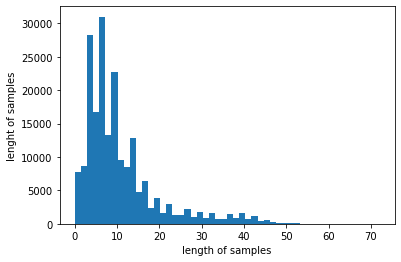

In [ ]:
# 리뷰 길이 분포 확인
print('리뷰의 최대 길이 :', max(len(l) for l in tokenized_data))
print('리뷰의 평균 길이 :', sum(map(len, tokenized_data))/len(tokenized_data))
plt.hist([len(s) for s in tokenized_data], bins=50)
plt.xlabel('length of samples')
plt.ylabel('number of samples')
plt.show()

In [ ]:
from gensim.models import Word2Vec
model = Word2Vec(sentences = tokenized_data, size = 100, window=5, min_count=5, workers =4, sg=0)

In [ ]:
model.wv.vectors.shape

(16477, 100)

In [ ]:
print(model.wv.most_similar("최민식"))

[('안성기', 0.8862869739532471), ('최민수', 0.8829717636108398), ('이정재', 0.8722139596939087), ('한석규', 0.868765115737915), ('김수현', 0.8516608476638794), ('이민호', 0.8503433465957642), ('송강호', 0.8455341458320618), ('엄태웅', 0.8454911112785339), ('설경구', 0.8420608639717102), ('베일', 0.8408347368240356)]


In [ ]:
print(model.wv.most_similar("히어로"))

[('슬래셔', 0.8758004903793335), ('호러', 0.8706105351448059), ('블록버스터', 0.8611665964126587), ('느와르', 0.851383626461029), ('무협', 0.8421202898025513), ('정통', 0.822514533996582), ('무비', 0.818385899066925), ('물의', 0.804700493812561), ('멜로', 0.8039902448654175), ('블랙', 0.7988128066062927)]


## 사전 훈련된 워드 임베딩

In [ ]:
import gensim
model = gensim.models.Word2Vec.load('./ko.bin')

In [ ]:
!pwd

/content


In [ ]:
ls

drive/  ratings.txt  sample_data/  w2v


In [ ]:
cd ./drive

/content/drive


In [ ]:
ls

MyDrive/  Shareddrives/


In [ ]:
cd ./MyDrive

/content/drive/MyDrive


In [ ]:
result = model.wv.most_similar("강아지")
print(result)

[('고양이', 0.7290452718734741), ('거위', 0.7185635566711426), ('토끼', 0.7056223154067993), ('멧돼지', 0.6950401067733765), ('엄마', 0.6934334635734558), ('난쟁이', 0.6806551218032837), ('한마리', 0.6770296096801758), ('아가씨', 0.6750352382659912), ('아빠', 0.6729634404182434), ('목걸이', 0.6512460708618164)]


In [ ]:
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
import numpy as np

In [ ]:
sentences = ['nice great best amazing', 'stop lies', 'pitiful nerd', 'excellent work', 'supreme quality', 'bad', 'highly respectable']
y_train = [1, 0, 0, 1, 1, 0, 1] # 긍정 1 부정 0

In [ ]:
# 토 큰 화 
t = Tokenizer()
t.fit_on_texts(sentences)
vocab_size = len(t.word_index) + 1

print(vocab_size)

16


In [ ]:
# 인코딩 
x_encoded = t.texts_to_sequences(sentences)
print(x_encoded)

[[1, 2, 3, 4], [5, 6], [7, 8], [9, 10], [11, 12], [13], [14, 15]]


In [ ]:
max_len = max(len(l) for l in x_encoded)
print(max_len)

4


In [ ]:
# Padding
x_train = pad_sequences(x_encoded, maxlen=max_len, padding= 'post')
y_train = np.array(y_train)
print(x_train)

[[ 1  2  3  4]
 [ 5  6  0  0]
 [ 7  8  0  0]
 [ 9 10  0  0]
 [11 12  0  0]
 [13  0  0  0]
 [14 15  0  0]]


In [ ]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Embedding, Flatten

model = Sequential()
model.add(Embedding(vocab_size, 4, input_length=max_len))
model.add(Flatten())
model.add(Dense(1, activation="sigmoid"))

In [ ]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding (Embedding)        (None, 4, 4)              64        
_________________________________________________________________
flatten (Flatten)            (None, 16)                0         
_________________________________________________________________
dense (Dense)                (None, 1)                 17        
Total params: 81
Trainable params: 81
Non-trainable params: 0
_________________________________________________________________


In [ ]:
model.compile(optimizer="adam", loss='binary_crossentropy', metrics=['acc'])
model.fit(x_train, y_train, epochs=100, verbose=2)

Epoch 1/100
1/1 - 1s - loss: 0.6992 - acc: 0.4286
Epoch 2/100
1/1 - 0s - loss: 0.6976 - acc: 0.4286
Epoch 3/100
1/1 - 0s - loss: 0.6960 - acc: 0.4286
Epoch 4/100
1/1 - 0s - loss: 0.6943 - acc: 0.5714
Epoch 5/100
1/1 - 0s - loss: 0.6927 - acc: 0.5714
Epoch 6/100
1/1 - 0s - loss: 0.6911 - acc: 0.5714
Epoch 7/100
1/1 - 0s - loss: 0.6895 - acc: 0.5714
Epoch 8/100
1/1 - 0s - loss: 0.6879 - acc: 0.5714
Epoch 9/100
1/1 - 0s - loss: 0.6863 - acc: 0.5714
Epoch 10/100
1/1 - 0s - loss: 0.6848 - acc: 0.7143
Epoch 11/100
1/1 - 0s - loss: 0.6832 - acc: 0.7143
Epoch 12/100
1/1 - 0s - loss: 0.6816 - acc: 0.7143
Epoch 13/100
1/1 - 0s - loss: 0.6800 - acc: 0.7143
Epoch 14/100
1/1 - 0s - loss: 0.6785 - acc: 0.7143
Epoch 15/100
1/1 - 0s - loss: 0.6769 - acc: 0.7143
Epoch 16/100
1/1 - 0s - loss: 0.6754 - acc: 0.7143
Epoch 17/100
1/1 - 0s - loss: 0.6738 - acc: 0.7143
Epoch 18/100
1/1 - 0s - loss: 0.6723 - acc: 0.7143
Epoch 19/100
1/1 - 0s - loss: 0.6707 - acc: 0.7143
Epoch 20/100
1/1 - 0s - loss: 0.6692 - a